In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model

In [2]:
file = pd.read_csv("USA.csv", usecols = [0,1,2])
file 

,Edad,TC,LCMR
0,1,4.9,0.153
1,2,13.7,0.304
2,3,15.8,0.604
3,4,17.1,2.416
4,5,17.9,8.111
...,...,...,...
65,3,9.7,0.297
66,4,9.0,1.150
67,5,9.1,3.106
68,6,7.3,8.804


In [3]:
gen_1 = file[0:13]
gen_2 = file[13:25]
gen_3 = file[25:36]
gen_4 = file[36:46]
gen_5 = file[46:55]
gen_6 = file[55:63]
gen_7 = file[63:70]

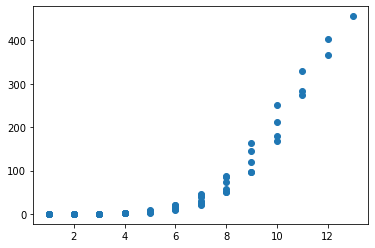

In [4]:
x = np.sort(np.array(file['Edad']))
y = np.sort(np.array(file["LCMR"]))
z = np.sort(np.array(file["TC"]))
cum = np.linspace(1.0/len(y),1.0,len(y))
#suma = get_suma(z)

#_ = plt.scatter(suma, y, c='r')
_ = plt.scatter(x,y)

In [5]:
def get_suma(y):
    z = []
    for i in range(len(y)):
        z.append(np.sum(y[0:i]))
        
    return np.array(z)

In [6]:
lin = sklearn.linear_model.LinearRegression()

In [7]:
X = np.array([x,x**2]).T

In [8]:
lin.fit(X,y)

LinearRegression()

In [9]:
y_pred = lin.predict(X)
y_pred = np.sort(y_pred, axis= 0)

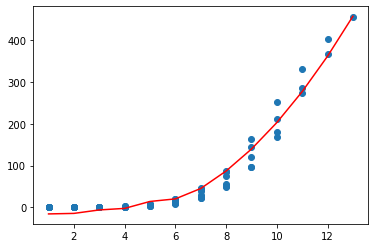

In [10]:
plt.scatter(x, y)
plt.plot(x, y_pred,'r')

In [11]:
score = lin.score(X, y)
print("y =   {}*X_1 + {}*X_2 + {} con R^2 de {}".format(lin.coef_[0],lin.coef_[1],lin.intercept_,score))

y =   -38.86840198917501*X_1 + 5.376634682558221*X_2 + 53.83950467877584 con R^2 de 0.9659513253030287


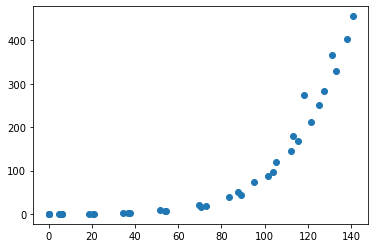

In [53]:
y1 = np.concatenate((gen_1["LCMR"],gen_2["LCMR"],gen_3["LCMR"]))
x1 = np.concatenate((get_suma(gen_1["TC"]) , get_suma(gen_2["TC"]),get_suma(gen_3["TC"])))
z = np.concatenate((gen_1["Edad"],gen_2["Edad"],gen_3['Edad']))
w1 = np.array(gen_1["TC"])
#plt.scatter(z,y1)
#plt.scatter(z,x1)
plt.scatter(x1,y1)

In [54]:
reg = sklearn.linear_model.LinearRegression()
x1.shape,y1.shape

((36,), (36,))

In [55]:
Z = np.array([x1,z]).T
#Z = Z.reshape(2,12).T
Z.shape

(36, 2)

In [56]:
reg.fit(Z,y1)

LinearRegression()

In [57]:
y_n1 = reg.predict(Z)
y_n1

array([-85.60852862,  -5.40999971,  24.90783917,  43.32233156,
        54.36808566,  60.87923157,  66.25672544,  81.2702617 ,
       124.62509911, 177.61597891, 240.80972713, 320.44143002,
       411.97647939, -85.60852862, -11.64508597,  13.00449268,
        29.71850701,  37.93013099,  42.17397281,  56.62068305,
        94.30726023, 141.6298798 , 199.15536779, 271.9851584 ,
       357.85194754, -85.60852862, -13.91239006,  12.43766666,
        25.75072485,  41.89791315,  53.51049327,  88.92976636,
       131.15095173, 180.74087539, 245.63510168, 324.69997854])

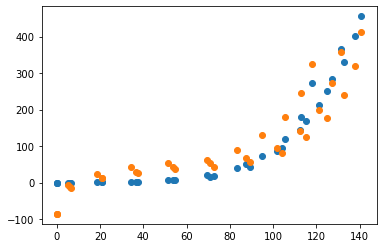

In [58]:
plt.scatter(x1, y1)
plt.scatter(x1, y_n1)

In [59]:
score = reg.score(Z, y1)
score

0.8795992843175221

In [19]:
reg.coef_, reg.intercept_

(array([ -5.66826023, 107.97300404]), -193.5815326602709)